In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# Open the reference file and select one reference

In [2]:
path = "/home/miguel/my_project_python/my_project_env/tfm/datasets"
os.chdir(path)

In [4]:
references = pd.read_csv("top_50_references.csv", sep="\t")

In [7]:
references.head()

,Reference,Date_BW,Units_sold,Net_Incomes,Date_ADS,Cost,Impresions
0,8141600,55,416,8533.68,126,379.78,174498
1,82462,38,363,11208.61,56,121.41,57854
2,82466,41,180,6270.32,126,158.68,96652
3,8146000,98,179,4401.90,39,263.21,106009
4,122539,99,148,5667.47,110,965.58,282555


In [8]:
references = references[references["Reference"]==48905] 

In [11]:
reference_48905 = references[['Reference']]

In [13]:
reference_48905.head()

,Reference
9,48905


# Open bw and select data from reference 48905

In [14]:
pwd

'/home/miguel/my_project_python/my_project_env/tfm/datasets'

In [18]:
path = "/home/miguel/my_project_python/my_project_env/tfm/datasets/bw"
os.chdir(path)

In [19]:
df_bw = pd.read_excel("BW.xlsx", sheet_name="BW")

In [20]:
df_bw.head()

,Referencia,Name,T Día natural,Valor neto pedidos,Cantidad en unidades (pedidos)
0,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",11.09.2017,18.93,1
1,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",21.09.2017,18.93,1
2,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",08.10.2017,16.08,1
3,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",16.10.2017,16.08,1
4,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",21.10.2017,16.08,1


In [21]:
df_bw = df_bw.rename(index=str, columns={"Referencia":"Reference", "T Día natural": "Date", "Valor neto pedidos": "Net Incomes", "Cantidad en unidades (pedidos)": "Units_Sold"})

In [22]:
df_bw.head()

,Reference,Name,Date,Net Incomes,Units_Sold
0,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",11.09.2017,18.93,1
1,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",21.09.2017,18.93,1
2,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",08.10.2017,16.08,1
3,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",16.10.2017,16.08,1
4,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",21.10.2017,16.08,1


In [23]:
df_bw["Date"] = pd.to_datetime(df_bw["Date"], format = "%d.%m.%Y")

In [37]:
merge_bw = df_bw.merge(reference_48905,
    how="inner",
    left_on=["Reference"],
    right_on=["Reference"])

In [38]:
merge_bw.head(5)

,Reference,Name,Date,Net Incomes,Units_Sold
0,48905,S/2 MESA METAL / MDF,2017-11-18,42.89,1
1,48905,S/2 MESA METAL / MDF,2017-11-22,72.90,2
2,48905,S/2 MESA METAL / MDF,2017-11-26,36.45,1
3,48905,S/2 MESA METAL / MDF,2017-11-27,36.45,1
4,48905,S/2 MESA METAL / MDF,2018-02-14,32.15,1


In [39]:
merge_bw.shape

(74, 5)

# open pageview file and merge con merge_bw by dates

In [40]:
path = "/home/miguel/my_project_python/my_project_env/tfm/datasets/pageviews"
os.chdir(path)

In [41]:
df_pageview = pd.read_csv("48905_url.csv")

In [42]:
df_pageview.head()

,Unnamed: 0,Reference,Dates,Page_Views
0,235,48905,2017-09-02,0.0
1,236,48905,2017-09-03,0.0
2,237,48905,2017-09-04,0.0
3,238,48905,2017-09-05,0.0
4,239,48905,2017-09-06,0.0


In [43]:
df_pageview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 4 columns):
Unnamed: 0    576 non-null int64
Reference     576 non-null int64
Dates         576 non-null object
Page_Views    576 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 18.1+ KB


In [69]:
df_pageview["Dates"] = pd.to_datetime(df_pageview["Dates"], format = "%Y-%m-%d")

In [70]:
merge_ref = merge_bw.merge(df_pageview,
    how="outer",
    left_on=["Date"],
    right_on=["Dates"])

In [71]:
column_interest = ["Reference_y", "Name", "Dates", "Net Incomes", "Units_Sold", "Page_Views"]
merge_ref = merge_ref[column_interest]

In [72]:
merge_ref.head()

,Reference_y,Name,Dates,Net Incomes,Units_Sold,Page_Views
0,48905,S/2 MESA METAL / MDF,2017-11-18,42.89,1.0,0.0
1,48905,S/2 MESA METAL / MDF,2017-11-22,72.90,2.0,19.0
2,48905,S/2 MESA METAL / MDF,2017-11-26,36.45,1.0,9.0
3,48905,S/2 MESA METAL / MDF,2017-11-27,36.45,1.0,0.0
4,48905,S/2 MESA METAL / MDF,2018-02-14,32.15,1.0,0.0


In [73]:
merge_ref.shape

(576, 6)

In [74]:
merge_ref = merge_ref[merge_ref["Dates"]>"2018-10-01"]

In [75]:
merge_ref.head()

,Reference_y,Name,Dates,Net Incomes,Units_Sold,Page_Views
47,48905,S/2 MESA METAL / MDF,2018-11-03,42.89,1.0,19.0
48,48905,S/2 MESA METAL / MDF,2018-11-06,38.60,1.0,37.0
49,48905,S/2 MESA METAL / MDF,2018-11-07,42.89,1.0,9.0
50,48905,S/2 MESA METAL / MDF,2018-11-17,124.38,3.0,47.0
51,48905,S/2 MESA METAL / MDF,2018-11-19,38.61,1.0,37.0


In [76]:
merge_ref.shape

(181, 6)

# open adwords file and merge with merge_ref

In [54]:
path = "/home/miguel/my_project_python/my_project_env/tfm/datasets/adwords/original_data"
os.chdir(path)

In [55]:
df_2018_19 = pd.read_csv("TFM_Datos_2018_19.csv", sep=";", error_bad_lines=True)

/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [56]:
df_2018_19.head()

,ID de producto,Campaña,ID de la campaña,Tipo de producto (primer nivel),Tipo de producto (segundo nivel),Día,Etiqueta personalizada 1,CPC máximo predeterminado del grupo de anuncios,Moneda,Impresiones,Clics,CTR,CPC medio,Coste,Conversiones,Todas las conversiones,Valor de conv.,Valor de todas las conversiones,Valor conv./coste
0,123624,Shop_Cocina y comedor_N1_Y18_W37,1559515409,cocina y comedor,tazas de café y mugs,12/10/2018,10,"0,15",EUR,1,0,"0,00 %","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
1,107553,Shop_Smart_Lámparas_Y18_W45,1623248621,lámparas e iluminación,lámparas de techo,31/01/2019,40,"0,01",EUR,2,0,"0,00 %","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
2,87810,Shop_Navidad_Estrellas de navidad_Y18_W12,1323457572,decoración de navidad,estrellas de navidad,17/10/2018,20,"0,2",EUR,1,0,"0,00 %","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
3,105114,Shop_Decoración_N1_Y18_W37,1559890739,decoración para tu casa,figuras decorativas,25/10/2018,30,"0,15",EUR,4,0,"0,00 %","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
4,111017,Shop_Navidad_Portavelas navideños_Y18_W12,1323682318,decoración de navidad,portavelas navideños,21/10/2018,20,"0,2",EUR,8,0,"0,00 %","0,00","0,00","0,00","0,00","0,00","0,00","0,00"


In [57]:
df_2018_19 = df_2018_19[df_2018_19["ID de producto"]==48905]

In [60]:
df_2018_19.head()

,ID de producto,Campaña,ID de la campaña,Tipo de producto (primer nivel),Tipo de producto (segundo nivel),Día,Etiqueta personalizada 1,CPC máximo predeterminado del grupo de anuncios,Moneda,Impresiones,Clics,CTR,CPC medio,Coste,Conversiones,Todas las conversiones,Valor de conv.,Valor de todas las conversiones,Valor conv./coste
2237,48905,Shop_Muebles_Mesas de centro y auxiliares_Y18_W12,1317788794,muebles,mesas de centro y auxiliares,14/12/2018,60,"0,16",EUR,676,8,"1,18 %","0,40","3,23","0,00","0,00","0,00","0,00","0,00"
2815,48905,Shop_Muebles_Mesas de centro y auxiliares_Y18_W12,1317788794,muebles,mesas de centro y auxiliares,08/01/2019,50,"0,16",EUR,398,6,"1,51 %","0,34","2,01","0,00","0,00","0,00","0,00","0,00"
6480,48905,Shop_Muebles_Mesas de centro y auxiliares_Y18_W12,1317788794,muebles,mesas de centro y auxiliares,07/01/2019,60,"0,16",EUR,789,13,"1,65 %","0,25","3,19","0,00","0,00","0,00","0,00","0,00"
18205,48905,Shop_Muebles_Mesas de centro y auxiliares_Y18_W12,1317788794,muebles,mesas de centro y auxiliares,23/12/2018,60,"0,16",EUR,1109,18,"1,62 %","0,32","5,78","0,00","0,00","0,00","0,00","0,00"
19064,48905,Shop_Muebles_Mesas de centro y auxiliares_Y18_W12,1317788794,muebles,mesas de centro y auxiliares,09/01/2019,50,"0,16",EUR,973,20,"2,06 %","0,33","6,52","0,00","0,00","0,00","0,00","0,00"


In [61]:
df_2018_19 = df_2018_19.rename(index=str, 
            columns={"ID de producto":"Reference", "Tipo de producto (primer nivel)": "CatN1",
                     "Tipo de producto (segundo nivel)":"CatN2", "Día":"Date", "Etiqueta personalizada 1": "Cat_Price", 
                     "CPC máximo predeterminado del grupo de anuncios": "CPC_max", "CPC medio": "CPC_medio", 
                     "Impresiones":"Impressions", "Coste":"Cost", "Conversiones": "Conversions",
                    "Todas las conversiones": "All_Conversions", "Valor de conv.": "Ads_Income", 
                    "Valor de todas las conversiones": "Ads_Income_All"})

In [62]:
df_2018_19.head()

,Reference,Campaña,ID de la campaña,CatN1,CatN2,Date,Cat_Price,CPC_max,Moneda,Impressions,Clics,CTR,CPC_medio,Cost,Conversions,All_Conversions,Ads_Income,Ads_Income_All,Valor conv./coste
2237,48905,Shop_Muebles_Mesas de centro y auxiliares_Y18_W12,1317788794,muebles,mesas de centro y auxiliares,14/12/2018,60,"0,16",EUR,676,8,"1,18 %","0,40","3,23","0,00","0,00","0,00","0,00","0,00"
2815,48905,Shop_Muebles_Mesas de centro y auxiliares_Y18_W12,1317788794,muebles,mesas de centro y auxiliares,08/01/2019,50,"0,16",EUR,398,6,"1,51 %","0,34","2,01","0,00","0,00","0,00","0,00","0,00"
6480,48905,Shop_Muebles_Mesas de centro y auxiliares_Y18_W12,1317788794,muebles,mesas de centro y auxiliares,07/01/2019,60,"0,16",EUR,789,13,"1,65 %","0,25","3,19","0,00","0,00","0,00","0,00","0,00"
18205,48905,Shop_Muebles_Mesas de centro y auxiliares_Y18_W12,1317788794,muebles,mesas de centro y auxiliares,23/12/2018,60,"0,16",EUR,1109,18,"1,62 %","0,32","5,78","0,00","0,00","0,00","0,00","0,00"
19064,48905,Shop_Muebles_Mesas de centro y auxiliares_Y18_W12,1317788794,muebles,mesas de centro y auxiliares,09/01/2019,50,"0,16",EUR,973,20,"2,06 %","0,33","6,52","0,00","0,00","0,00","0,00","0,00"


In [68]:
df_2018_19.shape

(86, 19)

In [77]:
df_2018_19["Date"] = pd.to_datetime(df_2018_19["Date"], format = "%d/%m/%Y")

In [82]:
df_2018_19 = df_2018_19[df_2018_19["Date"]>"2018-10-01"]

In [292]:
merge_end = df_2018_19.merge(merge_ref,
    how="outer",
    left_on=["Date"],
    right_on=["Dates"])

In [293]:
merge_end.shape

(184, 25)

In [294]:
merge_end.head()

,Reference,Campaña,ID de la campaña,CatN1,CatN2,Date,Cat_Price,CPC_max,Moneda,Impressions,...,All_Conversions,Ads_Income,Ads_Income_All,Valor conv./coste,Reference_y,Name,Dates,Net Incomes,Units_Sold,Page_Views
0,48905.0,Shop_Muebles_Mesas de centro y auxiliares_Y18_W12,1.317789e+09,muebles,mesas de centro y auxiliares,2018-12-14,60,"0,16",EUR,676.0,...,"0,00","0,00","0,00","0,00",48905,NaN,2018-12-14,NaN,NaN,28.0
1,48905.0,Shop_Muebles_Mesas de centro y auxiliares_Y18_W12,1.317789e+09,muebles,mesas de centro y auxiliares,2019-01-08,50,"0,16",EUR,398.0,...,"0,00","0,00","0,00","0,00",48905,NaN,2019-01-08,NaN,NaN,94.0
2,48905.0,Shop_Muebles_Mesas de centro y auxiliares_Y18_W12,1.317789e+09,muebles,mesas de centro y auxiliares,2019-01-08,60,"0,16",EUR,257.0,...,"0,00","0,00","0,00","0,00",48905,NaN,2019-01-08,NaN,NaN,94.0
3,48905.0,Shop_Muebles_Mesas de centro y auxiliares_Y18_W12,1.317789e+09,muebles,mesas de centro y auxiliares,2019-01-07,60,"0,16",EUR,789.0,...,"0,00","0,00","0,00","0,00",48905,S/2 MESA METAL / MDF,2019-01-07,38.6,1.0,19.0
4,48905.0,Shop_Muebles_Mesas de centro y auxiliares_Y18_W12,1.317789e+09,muebles,mesas de centro y auxiliares,2018-12-23,60,"0,16",EUR,1109.0,...,"0,00","0,00","0,00","0,00",48905,NaN,2018-12-23,NaN,NaN,0.0


In [295]:
merge_end.columns

Index(['Reference', 'Campaña', 'ID de la campaña', 'CatN1', 'CatN2', 'Date',
       'Cat_Price', 'CPC_max', 'Moneda', 'Impressions', 'Clics', 'CTR',
       'CPC_medio', 'Cost', 'Conversions', 'All_Conversions', 'Ads_Income',
       'Ads_Income_All', 'Valor conv./coste', 'Reference_y', 'Name', 'Dates',
       'Net Incomes', 'Units_Sold', 'Page_Views'],
      dtype='object')

In [296]:
colums_48905 = ["Reference_y", "Date", "Dates", "CPC_max", 'Impressions', 'Clics', 'CTR', 'CPC_medio', 'Cost', 'Conversions', 'All_Conversions', 'Ads_Income',
       'Ads_Income_All', 'Valor conv./coste','Net Incomes', 'Units_Sold', 'Page_Views']
merge_end = merge_end[colums_48905]

In [297]:
merge_end.shape

(184, 17)

In [298]:
merge_end.fillna(0, inplace=True)

In [299]:
pd.set_option('display.max_rows',500)

In [300]:
merge_end

,Reference_y,Date,Dates,CPC_max,Impressions,Clics,CTR,CPC_medio,Cost,Conversions,All_Conversions,Ads_Income,Ads_Income_All,Valor conv./coste,Net Incomes,Units_Sold,Page_Views
0,48905,2018-12-14 00:00:00,2018-12-14,"0,16",676.0,8.0,"1,18 %","0,40","3,23","0,00","0,00","0,00","0,00","0,00",0.00,0.0,28.0
1,48905,2019-01-08 00:00:00,2019-01-08,"0,16",398.0,6.0,"1,51 %","0,34","2,01","0,00","0,00","0,00","0,00","0,00",0.00,0.0,94.0
2,48905,2019-01-08 00:00:00,2019-01-08,"0,16",257.0,5.0,"1,95 %","0,31","1,53","0,00","0,00","0,00","0,00","0,00",0.00,0.0,94.0
3,48905,2019-01-07 00:00:00,2019-01-07,"0,16",789.0,13.0,"1,65 %","0,25","3,19","0,00","0,00","0,00","0,00","0,00",38.60,1.0,19.0
4,48905,2018-12-23 00:00:00,2018-12-23,"0,16",1109.0,18.0,"1,62 %","0,32","5,78","0,00","0,00","0,00","0,00","0,00",0.00,0.0,0.0
5,48905,2019-01-09 00:00:00,2019-01-09,"0,16",973.0,20.0,"2,06 %","0,33","6,52","0,00","0,00","0,00","0,00","0,00",38.60,1.0,28.0
6,48905,2018-12-21 00:00:00,2018-12-21,"0,16",1636.0,21.0,"1,28 %","0,29","6,13","0,00","0,00","0,00","0,00","0,00",0.00,0.0,9.0
7,48905,2018-11-21 00:00:00,2018-11-21,"0,16",595.0,13.0,"2,18 %","0,39","5,11","0,00","0,00","0,00","0,00","0,00",38.60,1.0,131.0
8,48905,2018-11-21 00:00:00,2018-11-21,"0,16",1928.0,41.0,"2,13 %","0,42","17,40","0,00","0,00","0,00","0,00","0,00",38.60,1.0,131.0
9,48905,2018-12-31 00:00:00,2018-12-31,"0,16",1017.0,18.0,"1,77 %","0,33","5,98","0,00","0,00","0,00","0,00","0,00",0.00,0.0,9.0


In [301]:
merge_end["Dates"] = merge_end["Dates"].drop_duplicates(keep='first')

In [302]:
merge_end = merge_end.sort_values(by="Dates")

In [303]:
merge_end = merge_end[:181]

In [304]:
merge_end.shape

(181, 17)

In [305]:
merge_end.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 88 to 87
Data columns (total 17 columns):
Reference_y          181 non-null int64
Date                 181 non-null object
Dates                181 non-null datetime64[ns]
CPC_max              181 non-null object
Impressions          181 non-null float64
Clics                181 non-null float64
CTR                  181 non-null object
CPC_medio            181 non-null object
Cost                 181 non-null object
Conversions          181 non-null object
All_Conversions      181 non-null object
Ads_Income           181 non-null object
Ads_Income_All       181 non-null object
Valor conv./coste    181 non-null object
Net Incomes          181 non-null float64
Units_Sold           181 non-null float64
Page_Views           181 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(10)
memory usage: 25.5+ KB


In [320]:
merge_end

,Reference_y,Date,Dates,CPC_max,Impressions,Clics,CTR,CPC_medio,Cost,Conversions,All_Conversions,Ads_Income,Ads_Income_All,ROAS_Ads,Incomes,Units_Sold,Page_Views,ROAS
88,48905,0,2018-10-02,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN
89,48905,0,2018-10-03,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN
90,48905,0,2018-10-04,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN
91,48905,0,2018-10-05,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN
92,48905,0,2018-10-06,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN
93,48905,0,2018-10-07,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN
94,48905,0,2018-10-08,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN
95,48905,0,2018-10-09,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN
96,48905,0,2018-10-10,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN
97,48905,0,2018-10-11,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN


In [306]:
merge_end["Cost"] = merge_end["Cost"].str.replace(",",".").astype(float)

In [307]:
merge_end["Cost"] = merge_end["Cost"].fillna(0)

In [308]:
merge_end = merge_end.rename(index=str, columns={"Net Incomes":"Incomes", "Valor conv./coste": "ROAS_Ads"})

In [275]:
def f(incomes, cost):
    if cost != 0:
        z = incomes / cost
    else:
        z = 0

In [276]:
#merge_end["ROAS"] = merge_end[['Net Incomes','Cost']].apply(lambda x: f(*x), axis=1)
merge_end["ROAS1"] = merge_end.apply(lambda row: f(row["Incomes"], row["Cost"]), axis=1)
#df['Value'] = df.apply(lambda row: my_test(row['a'], row['c']), axis=1)


/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [309]:
merge_end["ROAS"] = merge_end["Incomes"] / merge_end["Cost"]

In [255]:
merge_end["ROAS"] = merge_end["ROAS"].fillna(0)

/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [322]:
merge_end.shape

(81, 18)

In [321]:
merge_end = merge_end.replace([np.inf, -np.inf], np.nan).dropna()

In [323]:
merge_end

,Reference_y,Date,Dates,CPC_max,Impressions,Clics,CTR,CPC_medio,Cost,Conversions,All_Conversions,Ads_Income,Ads_Income_All,ROAS_Ads,Incomes,Units_Sold,Page_Views,ROAS
79,48905,2018-11-03 00:00:00,2018-11-03,0.16,379.0,5.0,0.013193,0.15,0.76,0.00,0.00,0.00,0.00,0.00,42.89,1.0,19.0,56.434211
55,48905,2018-11-04 00:00:00,2018-11-04,0.16,281.0,3.0,0.010676,0.14,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.0,37.0,0.000000
60,48905,2018-11-05 00:00:00,2018-11-05,0.16,376.0,7.0,0.018617,0.13,0.93,0.00,0.00,0.00,0.00,0.00,0.00,0.0,28.0,0.000000
33,48905,2018-11-06 00:00:00,2018-11-06,0.16,389.0,10.0,0.025707,0.22,2.18,0.00,1.00,0.00,0.00,0.00,38.60,1.0,37.0,17.706422
34,48905,2018-11-07 00:00:00,2018-11-07,0.16,349.0,5.0,0.014327,0.26,1.30,1.00,1.00,51.90,51.90,39.92,42.89,1.0,9.0,32.992308
63,48905,2018-11-08 00:00:00,2018-11-08,0.16,573.0,7.0,0.012216,0.13,0.94,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.000000
76,48905,2018-11-09 00:00:00,2018-11-09,0.16,426.0,8.0,0.018779,0.15,1.22,0.00,0.00,0.00,0.00,0.00,0.00,0.0,19.0,0.000000
67,48905,2018-11-10 00:00:00,2018-11-10,0.16,304.0,6.0,0.019737,0.27,1.60,0.00,0.00,0.00,0.00,0.00,0.00,0.0,19.0,0.000000
37,48905,2018-11-11 00:00:00,2018-11-11,0.16,282.0,7.0,0.024823,0.09,0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.0,19.0,0.000000
83,48905,2018-11-12 00:00:00,2018-11-12,0.16,405.0,12.0,0.029630,0.24,2.93,0.00,0.00,0.00,0.00,0.00,0.00,0.0,19.0,0.000000


In [311]:
merge_end.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 88 to 87
Data columns (total 18 columns):
Reference_y        181 non-null int64
Date               181 non-null object
Dates              181 non-null datetime64[ns]
CPC_max            181 non-null object
Impressions        181 non-null float64
Clics              181 non-null float64
CTR                181 non-null object
CPC_medio          181 non-null object
Cost               181 non-null float64
Conversions        181 non-null object
All_Conversions    181 non-null object
Ads_Income         181 non-null object
Ads_Income_All     181 non-null object
ROAS_Ads           181 non-null object
Incomes            181 non-null float64
Units_Sold         181 non-null float64
Page_Views         181 non-null float64
ROAS               83 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1), object(9)
memory usage: 26.9+ KB


In [312]:
merge_end["CPC_max"] = merge_end["CPC_max"].str.replace(",",".").astype(float)
merge_end["CPC_medio"] = merge_end["CPC_medio"].str.replace(",",".").astype(float)
merge_end["Conversions"] = merge_end["Conversions"].str.replace(",",".").astype(float)
merge_end["All_Conversions"] = merge_end["All_Conversions"].str.replace(",",".").astype(float)
merge_end["Ads_Income"] = merge_end["Ads_Income"].str.replace(",",".").astype(float)
merge_end["Ads_Income_All"] = merge_end["Ads_Income_All"].str.replace(",",".").astype(float)

In [313]:
merge_end["ROAS_Ads"] = merge_end["ROAS_Ads"].str.replace(",",".").astype(float)

In [314]:
merge_end["CPC_max"] = merge_end["CPC_max"].fillna(0)
merge_end["CPC_medio"] = merge_end["CPC_medio"].fillna(0)
merge_end["Conversions"] = merge_end["Conversions"].fillna(0)
merge_end["All_Conversions"] = merge_end["All_Conversions"].fillna(0)
merge_end["Ads_Income"] = merge_end["Ads_Income"].fillna(0)
merge_end["Ads_Income_All"] = merge_end["Ads_Income_All"].fillna(0)

In [315]:
merge_end["ROAS_Ads"] = merge_end["ROAS_Ads"].fillna(0)

In [316]:
merge_end["CTR"] = merge_end["Clics"] / merge_end["Impressions"]

In [317]:
merge_end["CTR"] = merge_end["CTR"].fillna(0)

In [318]:
merge_end = merge_end.loc[(merge_end!=0).any(axis=1)]

# Algoritmos

## Linear Multiple Regression

In [354]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [368]:
columns_algorithm = ['CPC_medio', 'Impressions', 'Clics', 'CTR', 
                     'Cost', 'Conversions', 'Ads_Income', 'ROAS_Ads', 
                     'Incomes', 'Units_Sold', 'Page_Views', 'ROAS']
merge_end = merge_end[columns_algorithm]

In [369]:
merge_end.columns

Index(['CPC_medio', 'Impressions', 'Clics', 'CTR', 'Cost', 'Conversions',
       'Ads_Income', 'ROAS_Ads', 'Incomes', 'Units_Sold', 'Page_Views',
       'ROAS'],
      dtype='object')

In [370]:
X = merge_end[['CPC_medio', 'Impressions', 'Clics', 'CTR', 
               'Cost', 'Conversions', 'Ads_Income', 'ROAS_Ads', 
               'Incomes', 'Units_Sold','Page_Views']] # pandas DataFrame
y = merge_end["ROAS"] # pandas Series

In [371]:
X.head()

,CPC_medio,Impressions,Clics,CTR,Cost,Conversions,Ads_Income,ROAS_Ads,Incomes,Units_Sold,Page_Views
79,0.15,379.0,5.0,0.013193,0.76,0.0,0.0,0.00,42.89,1.0,19.0
55,0.14,281.0,3.0,0.010676,0.41,0.0,0.0,0.00,0.00,0.0,37.0
60,0.13,376.0,7.0,0.018617,0.93,0.0,0.0,0.00,0.00,0.0,28.0
33,0.22,389.0,10.0,0.025707,2.18,0.0,0.0,0.00,38.60,1.0,37.0
34,0.26,349.0,5.0,0.014327,1.30,1.0,51.9,39.92,42.89,1.0,9.0


In [372]:
y.head()

79    56.434211
55     0.000000
60     0.000000
33    17.706422
34    32.992308
Name: ROAS, dtype: float64

In [373]:
X.shape

(81, 11)

In [374]:
X.describe()

,CPC_medio,Impressions,Clics,CTR,Cost,Conversions,Ads_Income,ROAS_Ads,Incomes,Units_Sold,Page_Views
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,0.303951,1156.049383,19.925926,0.018543,6.547284,0.143704,7.369753,1.127531,18.903210,0.469136,32.197531
std,0.080042,1126.983661,20.896039,0.008013,8.481278,0.438182,21.545637,4.859244,35.747557,0.895634,33.829137
min,0.090000,68.000000,2.000000,0.008794,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260000,426.000000,8.000000,0.014053,2.580000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,0.320000,901.000000,15.000000,0.017036,4.560000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
75%,0.350000,1352.000000,21.000000,0.020619,6.630000,0.000000,0.000000,0.000000,38.600000,1.000000,37.000000
max,0.520000,6553.000000,132.000000,0.061453,57.000000,2.200000,103.140000,39.920000,193.000000,5.000000,159.000000


In [375]:
y.describe()

count    81.000000
mean      4.844747
std      11.495521
min       0.000000
25%       0.000000
50%       0.000000
75%       3.822772
max      64.014925
Name: ROAS, dtype: float64

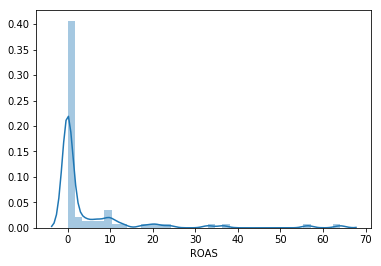

In [376]:
sns.distplot(merge_end['ROAS']);

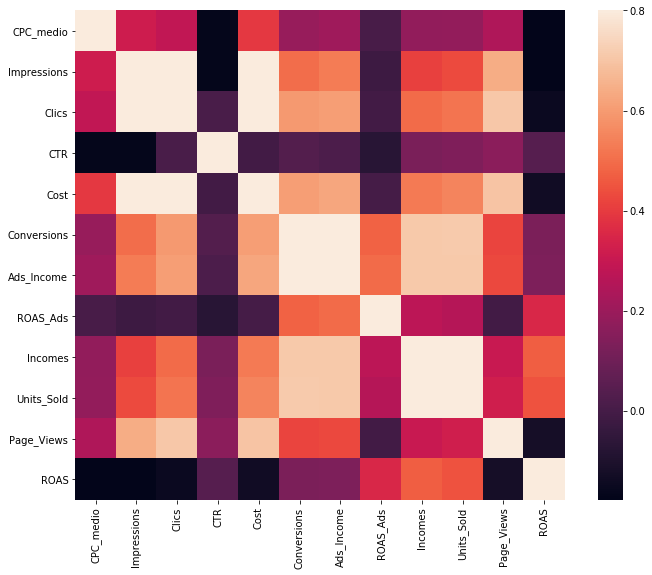

In [377]:
corrmat = merge_end.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [378]:
corr_matrix = merge_end.corr()
corr_matrix["ROAS"].sort_values(ascending=False)

ROAS           1.000000
Incomes        0.468846
Units_Sold     0.447619
ROAS_Ads       0.350591
Ads_Income     0.133970
Conversions    0.128713
CTR            0.043161
Page_Views    -0.121411
Cost          -0.133101
Clics         -0.150881
Impressions   -0.175061
CPC_medio     -0.177755
Name: ROAS, dtype: float64

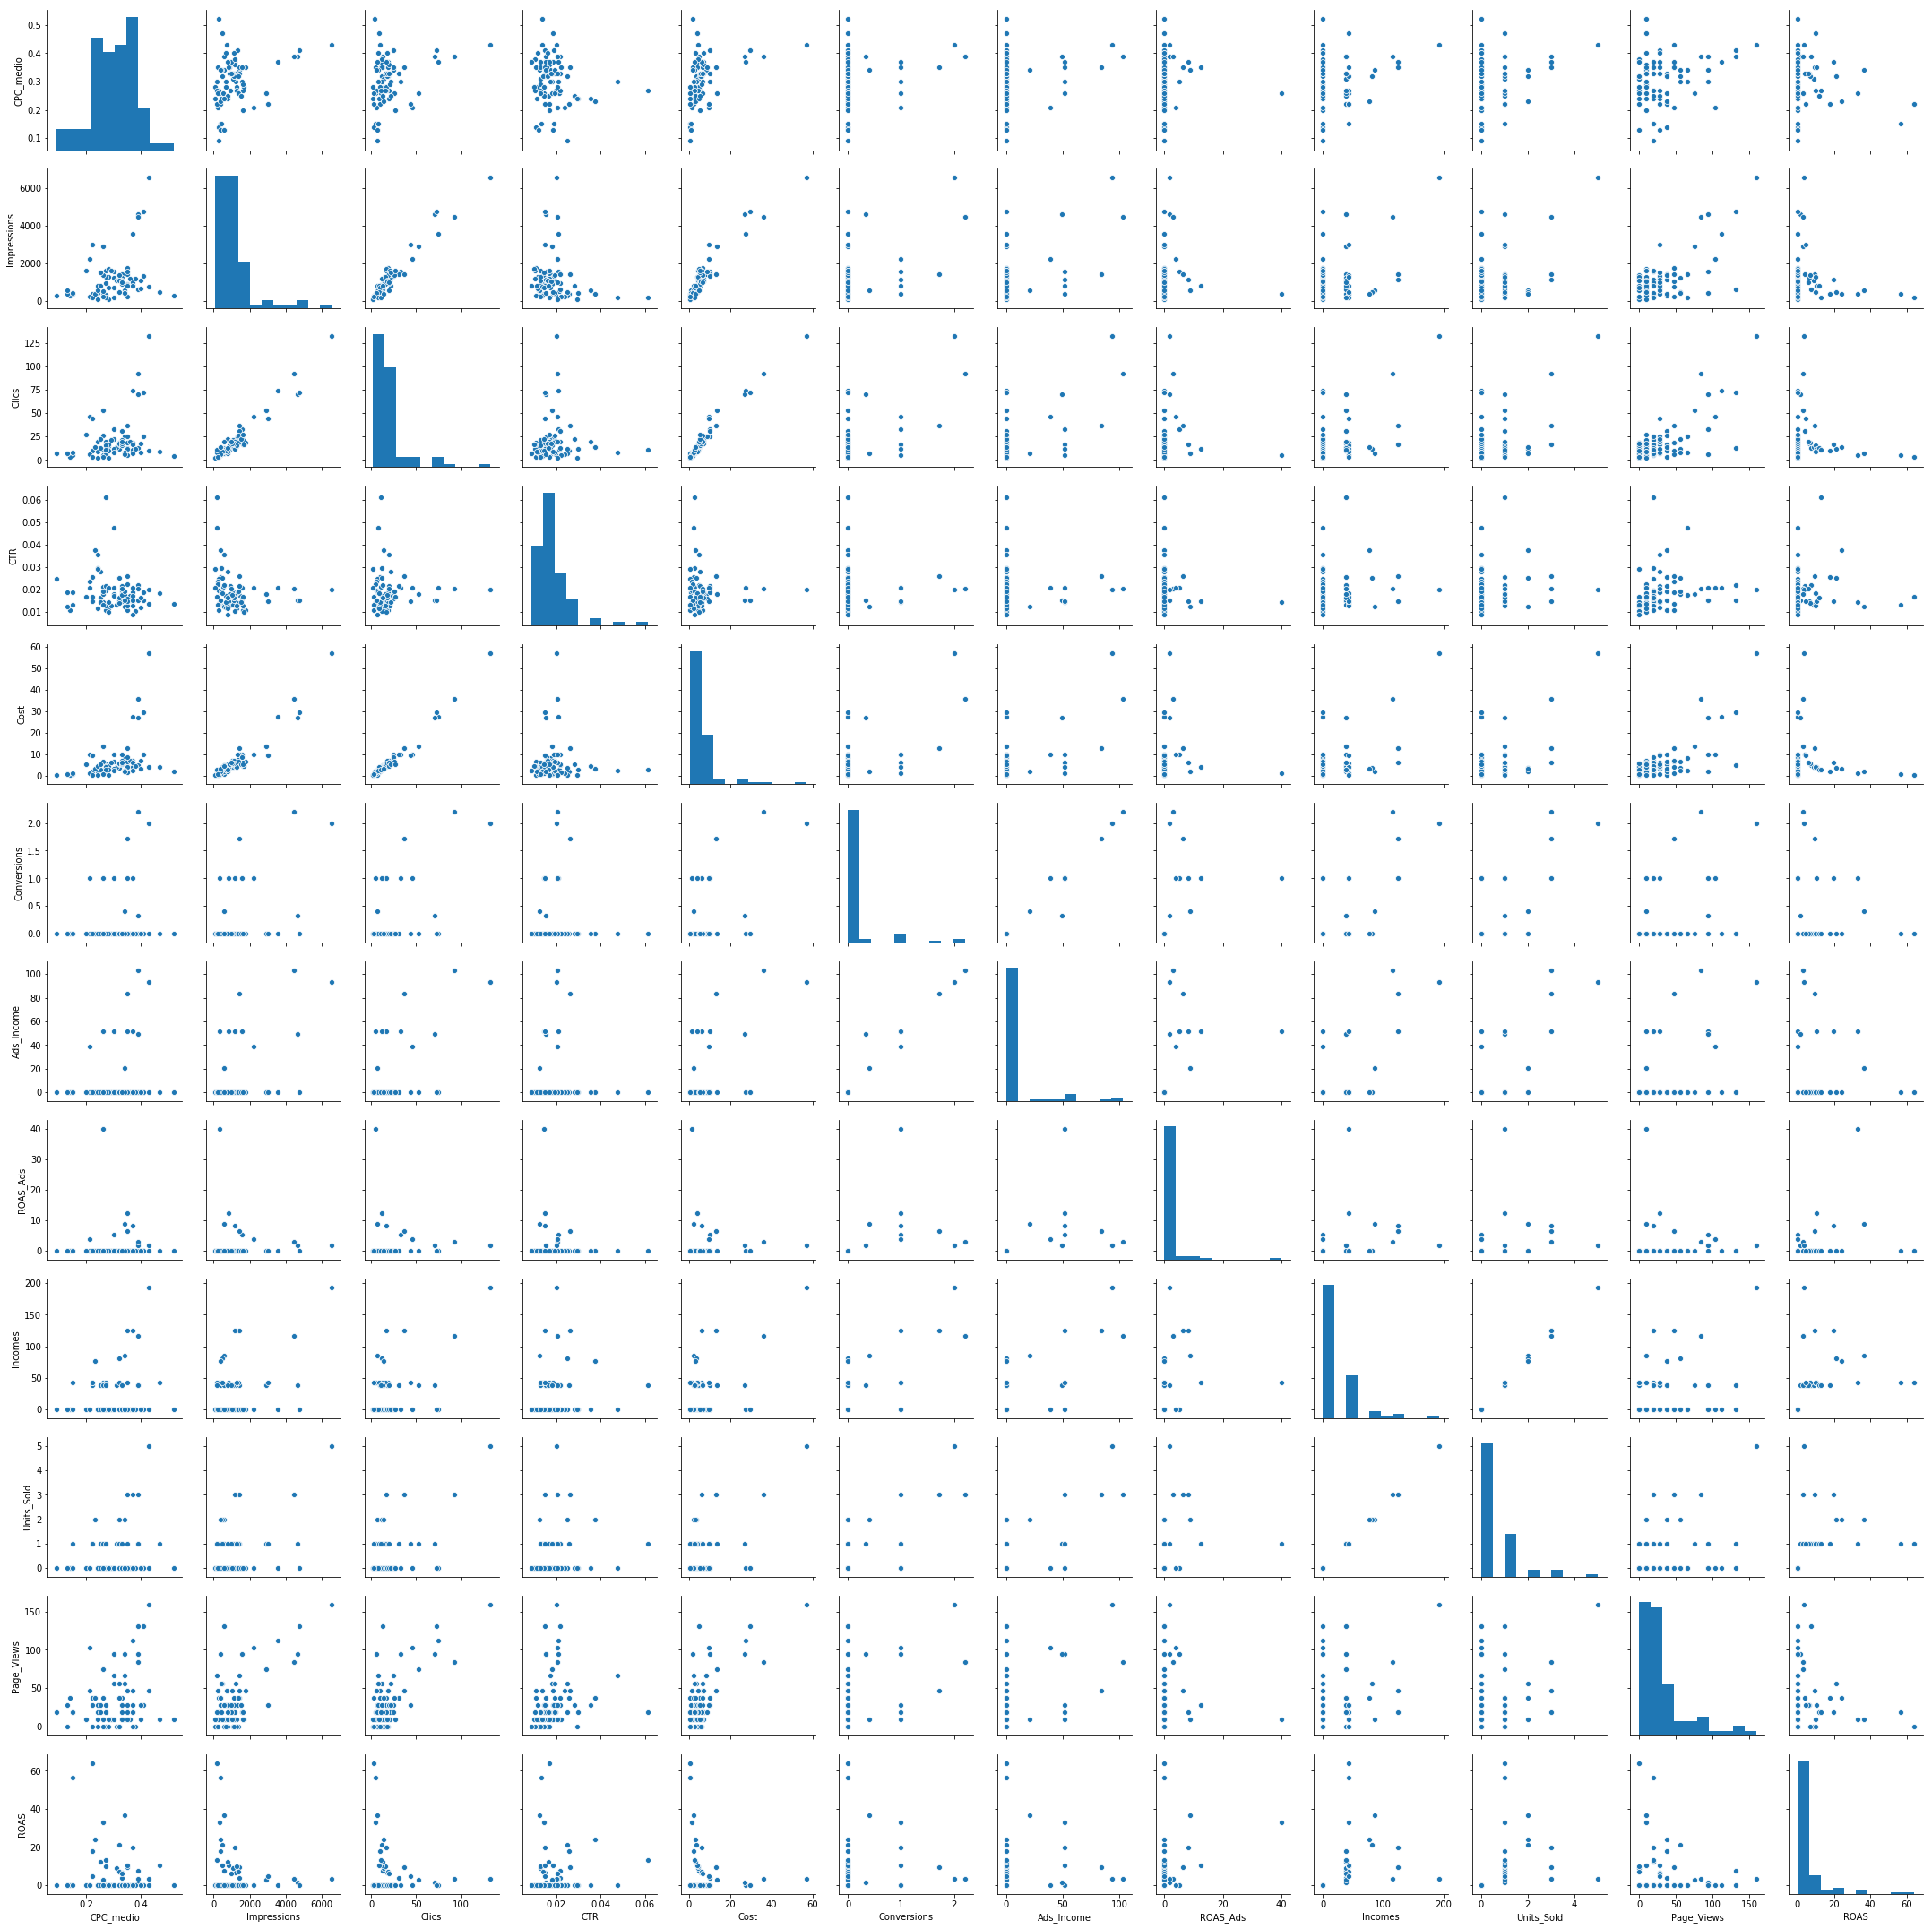

In [379]:
sns.pairplot(merge_end)

In [380]:
#import model
#from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [381]:
#save the model to an object
reg = LinearRegression()

In [330]:
from sklearn.model_selection import train_test_split

In [421]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [422]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [423]:
reg.intercept_

21.27645652385522

In [424]:
print(reg.coef_)

[-5.12651168e+01 -6.57958130e-03 -3.32569838e-01 -1.31419809e+02
  1.54583591e+00  4.60561992e+01 -1.34781363e+00  7.63089480e-01
  3.27426933e+00 -1.20797233e+02  6.74089090e-02]


In [425]:
pred = reg.predict(X_test)
pred

array([ 12.18818878,   6.69458889,  -2.72094182,  -2.94286377,
         5.63061003,  -0.95426684,   1.85060816,   8.58168301,
         0.74464914,  -0.48434327, -18.73155742,  -2.95533303,
         8.8219401 ,  -0.37614009,  -1.77202915,   0.93131641,
        10.68851137,   2.15965496,  -1.0628641 ,  -3.24672628,
        30.92524664,   0.57540538,   8.87515409,   3.20965968,
       -50.46871289])

In [426]:
#MSE
round(np.mean((reg.predict(X_test)-y_test)**2),3)

144.753

In [427]:
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])  
coeff_df 

,Coefficient
CPC_medio,-51.265117
Impressions,-0.006580
Clics,-0.332570
CTR,-131.419809
Cost,1.545836
Conversions,46.056199
Ads_Income,-1.347814
ROAS_Ads,0.763089
Incomes,3.274269
Units_Sold,-120.797233


In [390]:
from sklearn.metrics import mean_absolute_error

In [391]:
mean_absolute_error(reg.predict(X_test), y_test)

4.014459211787476

In [395]:
MAPE = np.mean(np.abs(y_test-pred)/y_test) ### da error

In [396]:
MAPE

inf

In [397]:
reg.score(X_test, y_test)

-0.5828465679173183

In [402]:
reg.coef_.tolist()

[-48.84556155965779,
 -0.004765739259468247,
 -0.2754708026690411,
 -133.5884345233922,
 1.197252785176848,
 -17.498539435084858,
 0.006716625177856865,
 0.6810014772900429,
 2.87504380651437,
 -105.07905419827368,
 0.0658852136563612]

In [404]:
names = [i for i in list(X)]
names

['CPC_medio',
 'Impressions',
 'Clics',
 'CTR',
 'Cost',
 'Conversions',
 'Ads_Income',
 'ROAS_Ads',
 'Incomes',
 'Units_Sold',
 'Page_Views']

In [407]:
pd.DataFrame(zip(names, reg.coef_.tolist()), columns = ["names", "coefficients"])

,names,coefficients
0,CPC_medio,-48.845562
1,Impressions,-0.004766
2,Clics,-0.275471
3,CTR,-133.588435
4,Cost,1.197253
5,Conversions,-17.498539
6,Ads_Income,0.006717
7,ROAS_Ads,0.681001
8,Incomes,2.875044
9,Units_Sold,-105.079054


In [428]:
y_pred = reg.predict(X_test)  

In [429]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
33,17.706422,12.188189
1,0.000000,6.694589
16,0.000000,-2.720942
6,0.000000,-2.942864
12,10.236277,5.630610
81,0.000000,-0.954267
35,0.000000,1.850608
3,12.100313,8.581683
72,0.000000,0.744649
61,0.000000,-0.484343


In [430]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 6.024241294305064
Mean Squared Error: 144.75301432042355
Root Mean Squared Error: 12.031334685745533


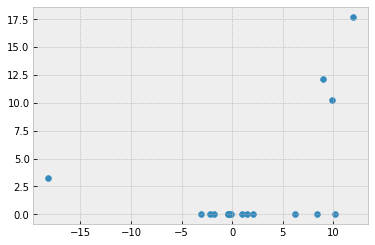

In [408]:
style.use("bmh")
plt.scatter(reg.predict(X_test), y_test)
plt.show()

In [409]:
#Select important variables for the model

In [410]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [412]:
model1=sm.OLS(y_train,X_train)

In [413]:
result=model1.fit()

In [415]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   ROAS   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     7.930
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           6.24e-08
Time:                        07:48:17   Log-Likelihood:                -226.88
No. Observations:                  64   AIC:                             475.8
Df Residuals:                      53   BIC:                             499.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
CPC_medio      -9.2215     11.010     -0.838      

In [419]:
#Seleccionamos solo variables por debajo de p < 0,05
model2=sm.OLS(y_train,X_train[["Incomes", "Units_Sold"]])

In [420]:
result=model2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   ROAS   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     30.28
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           6.70e-10
Time:                        07:53:12   Log-Likelihood:                -236.21
No. Observations:                  64   AIC:                             476.4
Df Residuals:                      62   BIC:                             480.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Incomes        3.3327      0.690      4.828      0.0

In [348]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [349]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [350]:
clf.score(X_test,y_test)

0.8488371445816836